In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from pandas_ml import ConfusionMatrix
warnings.filterwarnings('once')

In [2]:
songs = [
'Option 1: Gordon Lightfoot - Early Morning Rain         (FOLK)',
'Option 2: Childish Gambino - This is America            (RAP)',
'Option 3: Imagine Dragons - Thunder                     (ROCK/POP)',
'Option 4: Guitar Slim - The Things That I Used To Do    (Blues)',
'Option 5: Avicii - The Nights                           (ELECTRONIC)',
'Option 6: DJ Cheb I Sabbah - Lagi Lagan                 (WORLD)',
'Option 7: The Knocks - Ride or Die                      (POP/ROCK)',
'Option 8: Zap Mama - Vivre                              (WORLD)',
'Option 9: Nash and Young - Teach Your Children          (FOLK)',
'Option 10: AC/DC - Thunderstruck                        (Rock)',
'Option 11: Darius Rucker - If I Told You                (Country)',
'Option 12: Galantis - Spaceship                         (ELECTRONIC)',
'Option 13: XXXTENTACION - SAD!                          (RAP)',
'Option 14: REMOVED - INVALID                            (Classical)',
'Option 15: Naggo Morris - Flour Power                   (Reggae)',
'Option 16: Beethoven - Moonlight Sonata                 (Classic)',
'Option 17: Wild Rivers - Howling                        (Folk)',
'Option 18: Troye Sivan - Bloom                          (POP)',
'Option 19: Pharrell Williams and Camila Cabelle - Sangria Wine  (POP)',
'Option 20: Chris Stapleton - Tennessee Whiskey          (Country)',
'Option 21: Magic Sam - All Your Love                    (Blues)']

In [3]:
genres = ['rock', 'blues', 'country', 'reggae', 'rap', 'electronic', 'world', 'classical', 'folk', 'pop']
df = pd.read_csv('responses.csv')
df.describe()

,picked
count,52.000000
mean,11.057692
std,5.329950
min,1.000000
25%,7.000000
50%,11.000000
75%,15.000000
max,21.000000


In [4]:
df.head()

,timestamp,favorite genre,liked features,liked features reduced,least favorite genre,disliked features,disliked reduced,activity|genre pairs,picked,actual genre,genre classified,familiar,intended emotion,expected activities,expected reduced,adjectives
0,6/8/2018 23:50,world,i love hearing different languages and differe...,"multilingual, variety",country,it's just overprocessed pop with fake accents ...,"overprocessed, vocals, simplistic",unknown,7,pop,electronic,no,"content, energetic, happy, proud",skateboard??,physical,cringey
1,6/8/2018 23:51,classical,the complexity and multi-layered composition o...,"complexity, depth, sophisticated",rap,it lacks complex sound and sophisticated instr...,simplistic,"studying;videogames;working|classical,driving|...",11,country,pop,maybe,loving,"driving, general background music","travel, generic","longing, interesting, ordinary"
2,6/9/2018 0:14,pop,pop is a very broad term that (in my eyes) enc...,encompassing,country,every song sounds the same,generic,traveling|indie,7,pop,electronic,no,hurt,sitting on a train,travel,"lustful, hopeful"
3,6/9/2018 0:18,electronic,"originality, wide range of subgenres, focus on...","originality, variety, focus",pop,almost never has any deep meaning; melodies ar...,"shallow, generic, unpleasant","depression|electronic,studying|classical",9,folk,country,no,"content, inspired, loving, proud",torturing my neglective stepfather,NaN,"mature, inspiring, calm, empathetic"
4,6/9/2018 0:29,electronic,the emotions i feel when i listen to it,emotional,reggae,the singing style,vocals,NaN,18,pop,pop,no,"content, happy, inspired, loving, proud",cuddling with significant other,cuddle,"hip, newer, new-age, loving"


In [5]:
sns.set_style('white')
plt.xkcd()

<matplotlib.pyplot.xkcd.<locals>.dummy_ctx at 0x7f8cd14e1a58>

/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


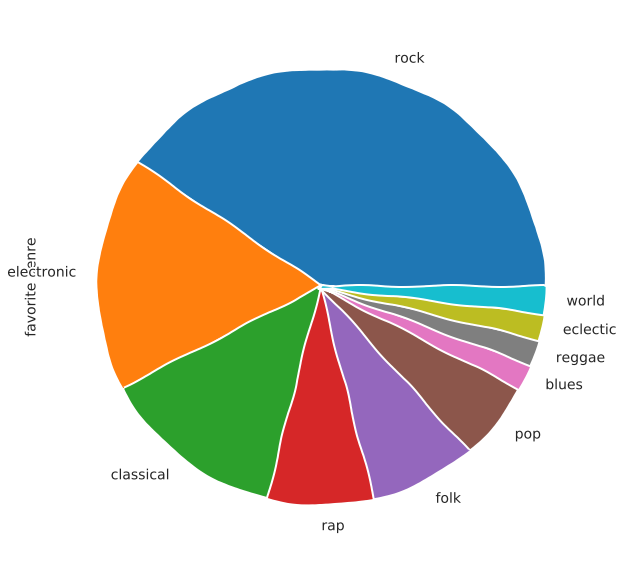

In [6]:
plt.figure(figsize=(10,10))
df['favorite genre'].value_counts().plot(kind='pie')

/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


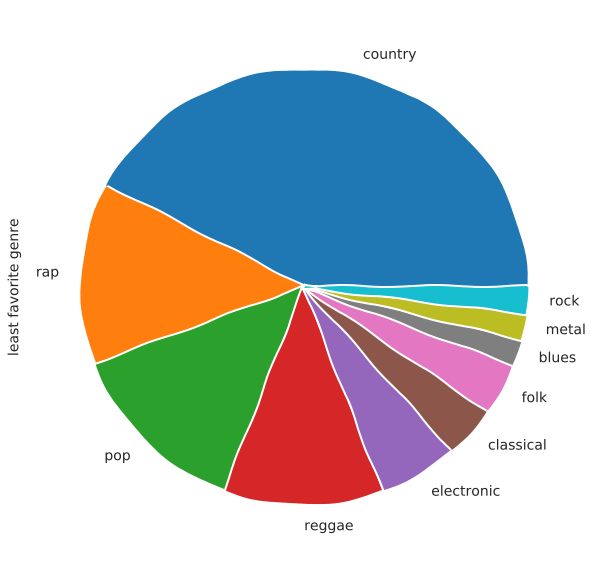

In [7]:
plt.figure(figsize=(10,10))
df['least favorite genre'].value_counts().plot(kind='pie')

/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


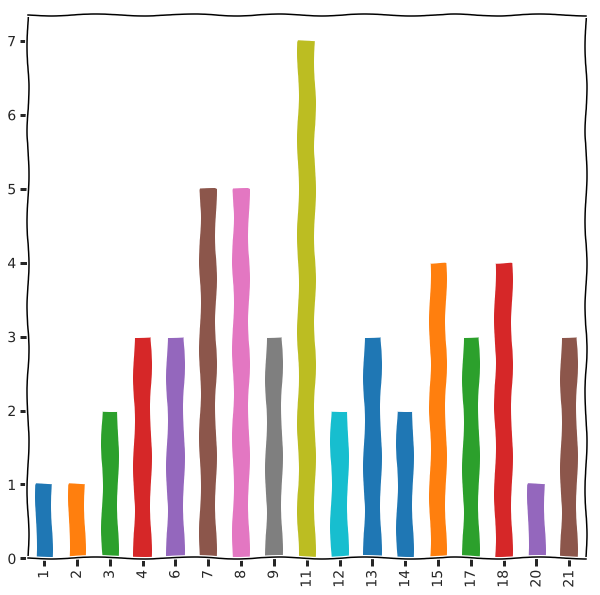

In [8]:
plt.figure(figsize=(10,10))
df['picked'].value_counts().sort_index().plot(kind='bar')

/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


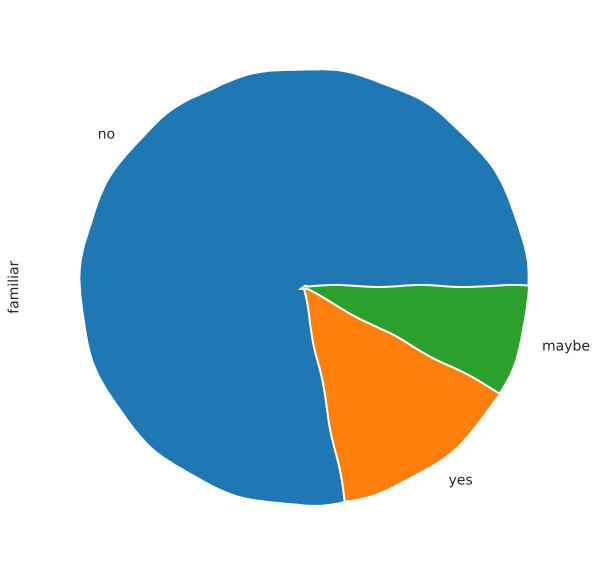

In [9]:
plt.figure(figsize=(10,10))
df['familiar'].value_counts().plot(kind='pie')

In [10]:
# Here i'm going to change the short answers to lists
liked_des = df[['favorite genre','liked features reduced']].dropna()
liked_des.head()

,favorite genre,liked features reduced
0,world,"multilingual, variety"
1,classical,"complexity, depth, sophisticated"
2,pop,encompassing
3,electronic,"originality, variety, focus"
4,electronic,emotional


In [11]:
def plot_liked_attribs(genre):
    fig = plt.figure(figsize=(10,10))
    features = liked_des[liked_des['favorite genre'] == genre]
    if features.empty:
        return
    features['liked features reduced'] = features['liked features reduced'].str.split(', ')
#     print(features.head())
    a = []
    for attribs in features['liked features reduced']:
        a.extend(attribs)
    pd.Series(a).value_counts().plot(kind='pie', title=genre)

/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


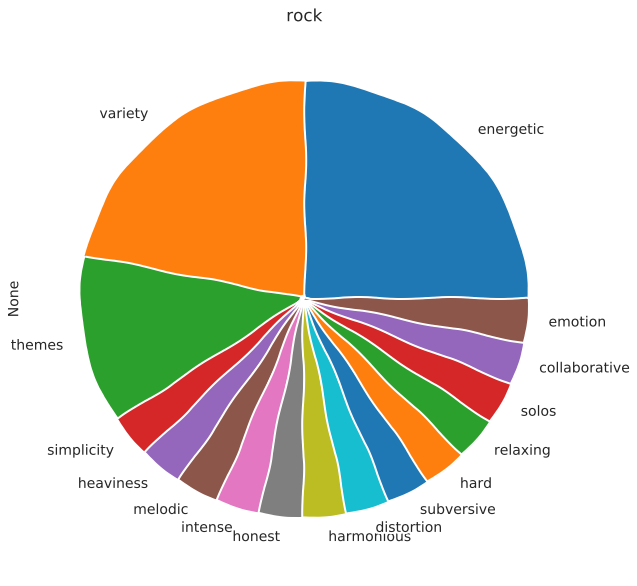

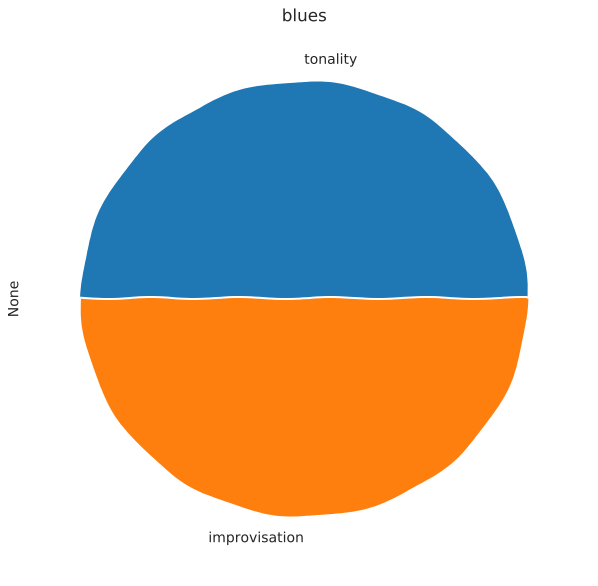

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

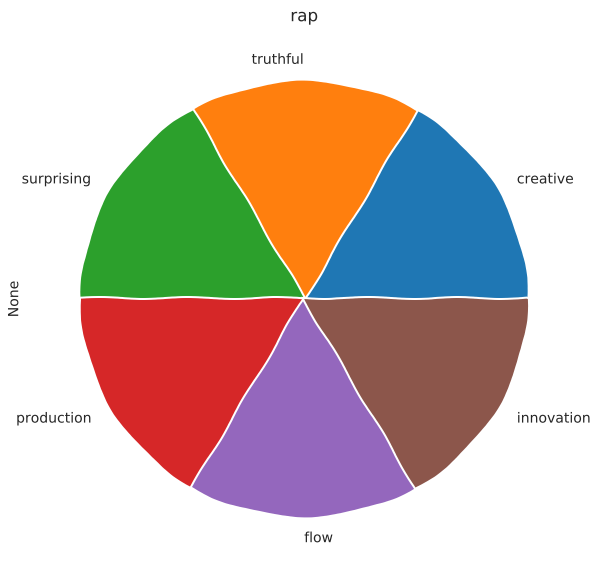

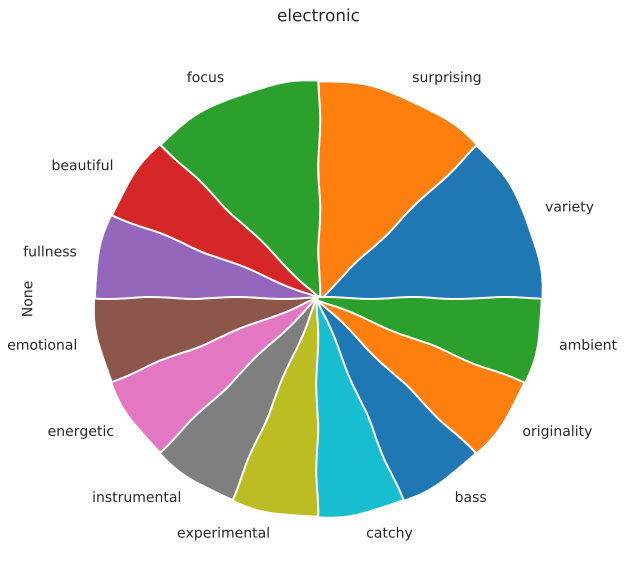

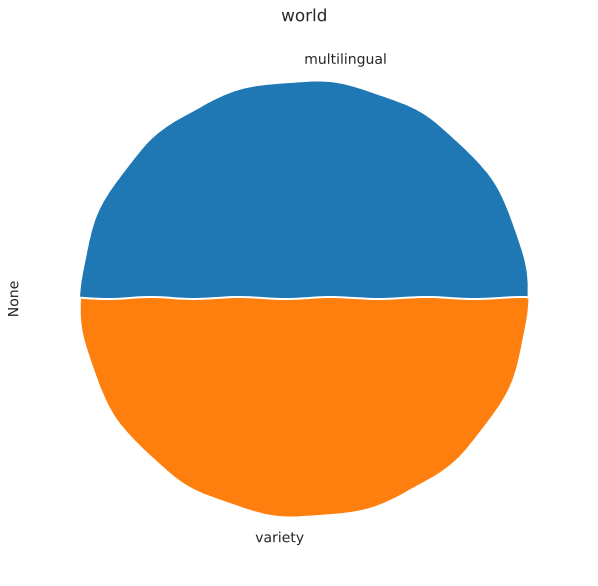

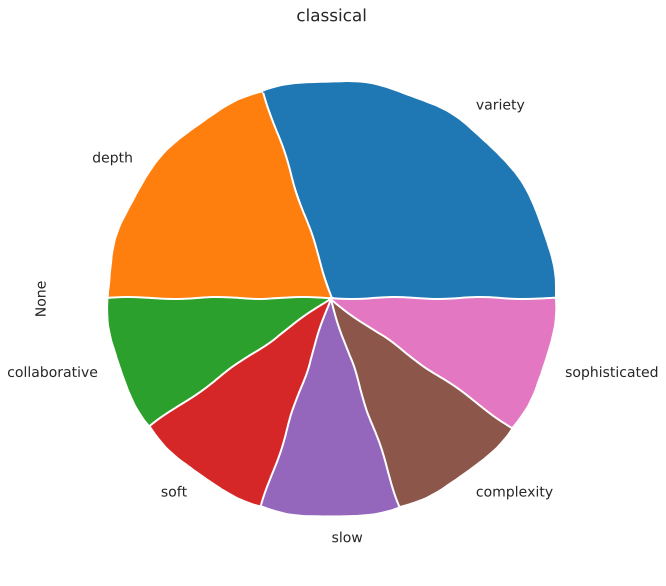

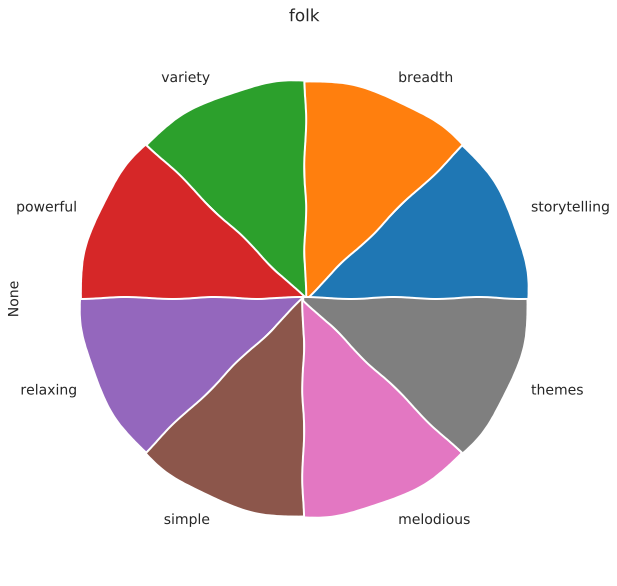

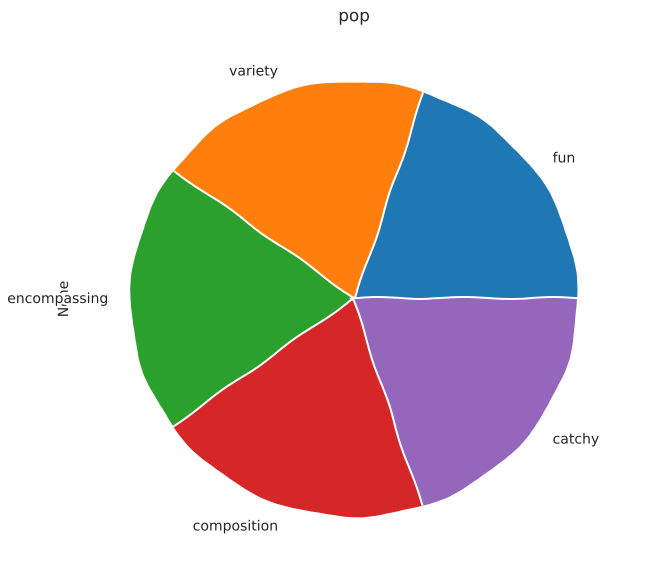

In [12]:
for genre in genres:
    plot_liked_attribs(genre)

In [13]:
disliked_des = df[['least favorite genre', 'disliked reduced']].dropna()
disliked_des.head()

,least favorite genre,disliked reduced
0,country,"overprocessed, vocals, simplistic"
1,rap,simplistic
2,country,generic
3,pop,"shallow, generic, unpleasant"
4,reggae,vocals


In [14]:
def plot_disliked_attribs(genre):
    fig = plt.figure(figsize=(10,10))
    features = disliked_des[disliked_des['least favorite genre'] == genre]
    if features.empty:
        return
    features['disliked reduced'] = features['disliked reduced'].str.split(', ')
#     print(features.head())
    a = []
    for attribs in features['disliked reduced']:
        a.extend(attribs)
    pd.Series(a).value_counts().plot(kind='pie', title=genre)

/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


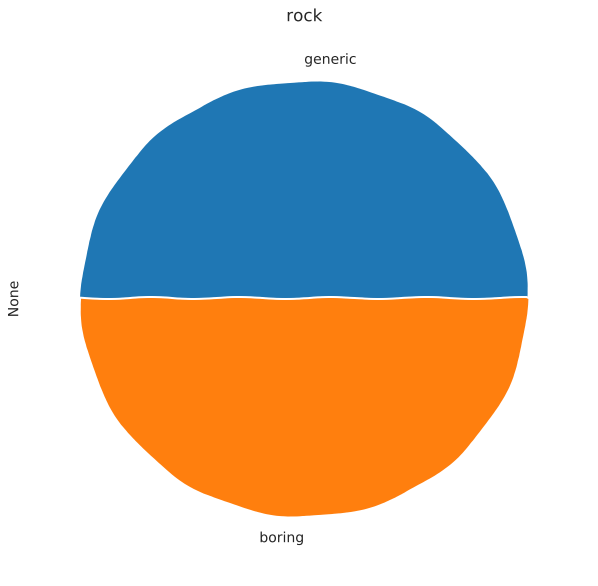

<Figure size 720x720 with 0 Axes>

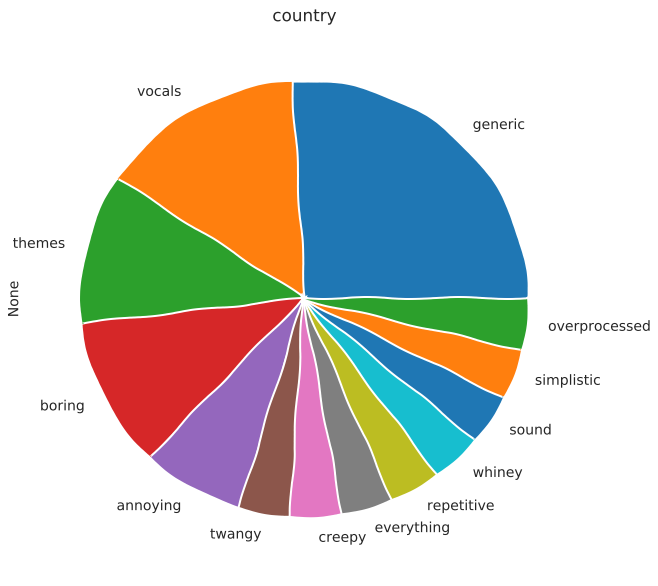

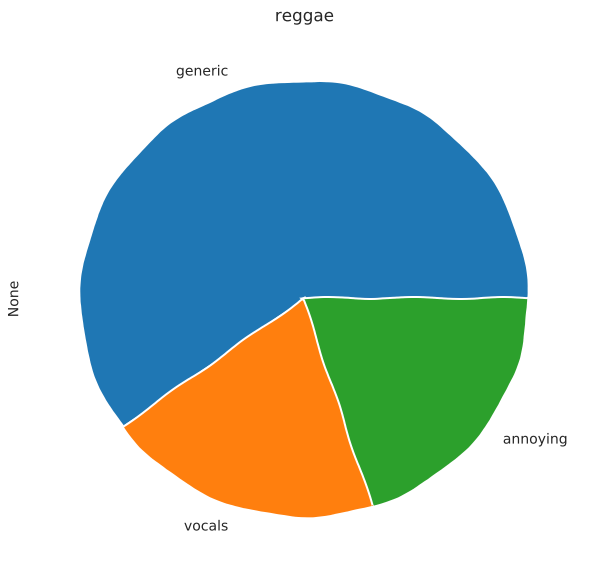

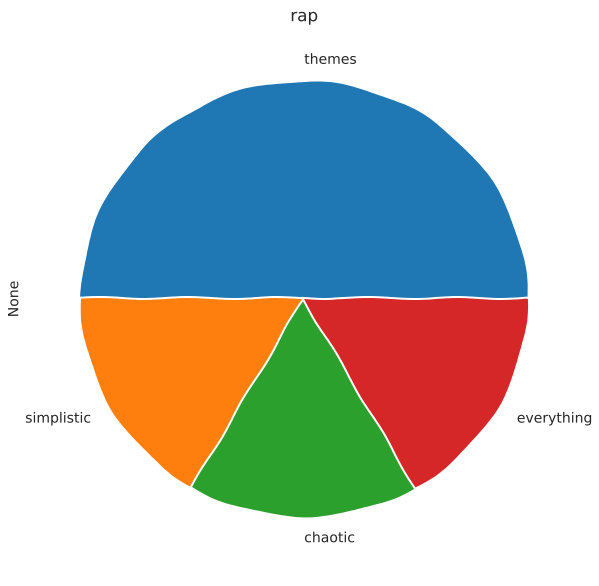

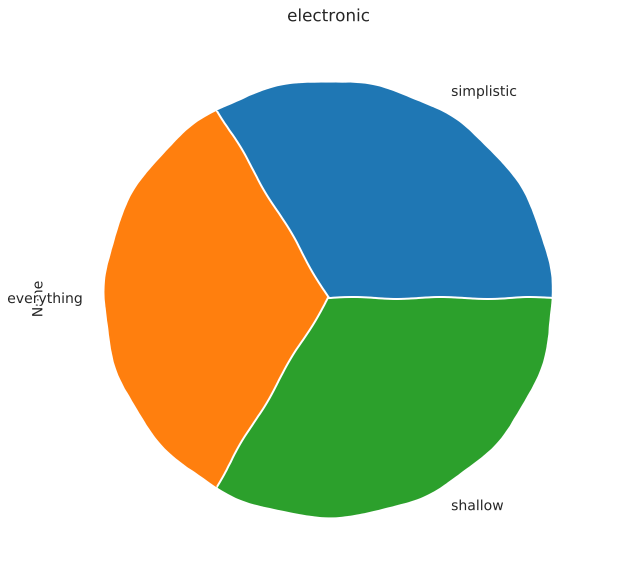

<Figure size 720x720 with 0 Axes>

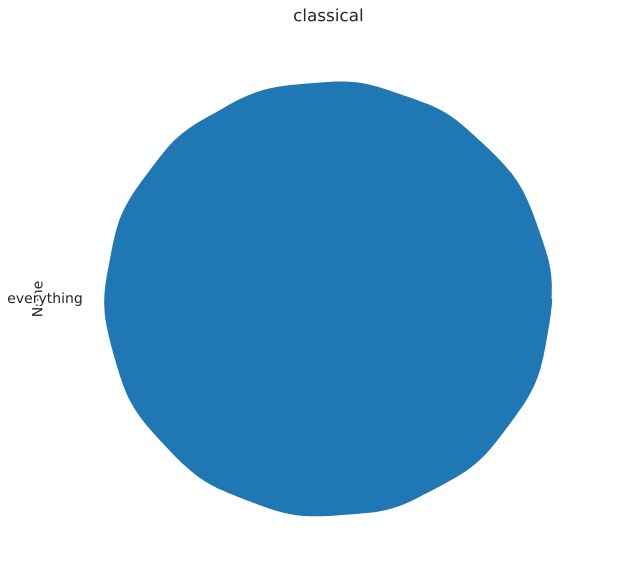

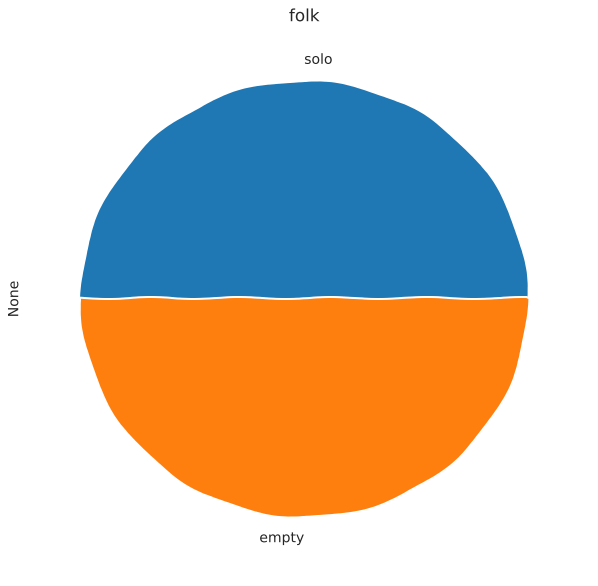

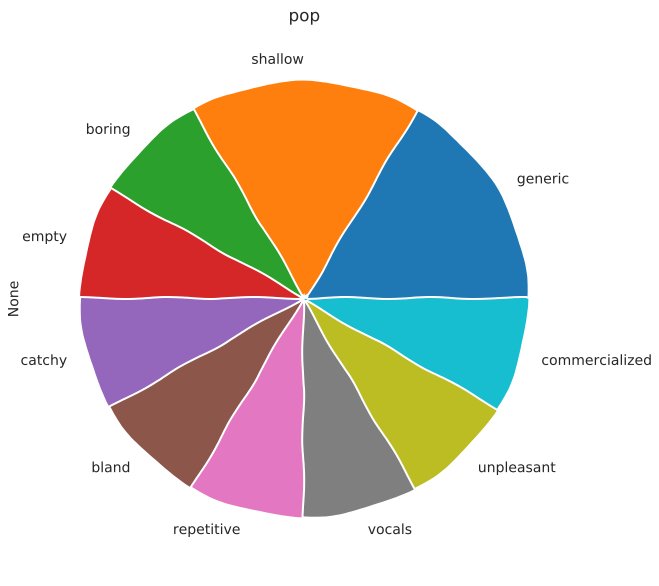

In [15]:
for genre in genres:
    plot_disliked_attribs(genre)

/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


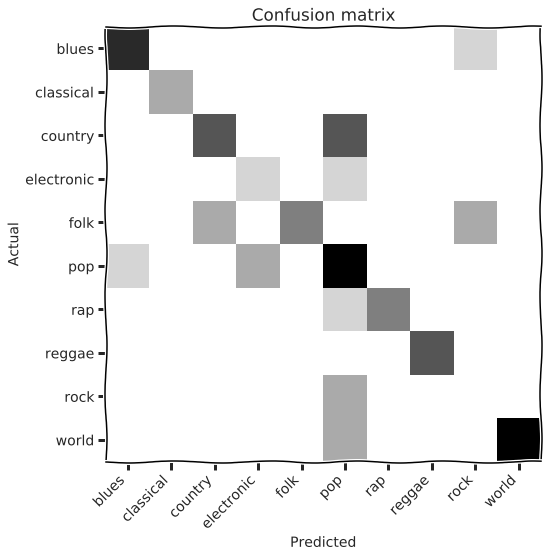

In [16]:
cnf_matrix = ConfusionMatrix(df['actual genre'], df['genre classified'])
cnf_matrix.plot()

In [17]:
cnf_matrix.print_stats()

/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/pandas_ml/confusion_matrix/stats.py:60: FutureWarning: supplying multiple axes to axis is deprecated and will be removed in a future version.
  num = df[df > 1].dropna(axis=[0, 1], thresh=1).applymap(lambda n: choose(n, 2)).sum().sum() - np.float64(nis2 * njs2) / n2
/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:332: RuntimeWarning: divide by zero encountered in double_scalars
  return(np.float64(self.TPR) / self.FPR)


Confusion Matrix:

Predicted   blues  classical  country  electronic  folk  pop  rap  reggae  \
Actual                                                                      
blues           5          0        0           0     0    0    0       0   
classical       0          2        0           0     0    0    0       0   
country         0          0        4           0     0    4    0       0   
electronic      0          0        0           1     0    1    0       0   
folk            0          0        2           0     3    0    0       0   
pop             1          0        0           2     0    6    0       0   
rap             0          0        0           0     0    1    3       0   
reggae          0          0        0           0     0    0    0       4   
rock            0          0        0           0     0    2    0       0   
world           0          0        0           0     0    2    0       0   
__all__         6          2        6           3     3  

In [18]:
emot = df[['actual genre', 'intended emotion']].dropna()
emot.head()

,actual genre,intended emotion
0,pop,"content, energetic, happy, proud"
1,country,loving
2,pop,hurt
3,folk,"content, inspired, loving, proud"
4,pop,"content, happy, inspired, loving, proud"


In [19]:
# print(emot)
def plot_intended_emotion(genre):
    fig = plt.figure(figsize=(10,10))
    features = emot[emot['actual genre'] == genre]
    if features.empty:
        return
    features['intended emotion'] = features['intended emotion'].str.split(', ')
#     print(features.head())
    a = []
    for attribs in features['intended emotion']:
        a.extend(attribs)
    pd.Series(a).value_counts().plot(kind='pie', title=genre)

/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


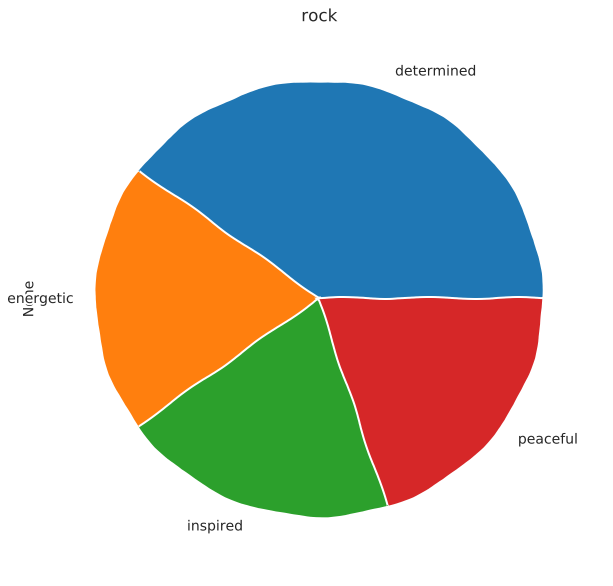

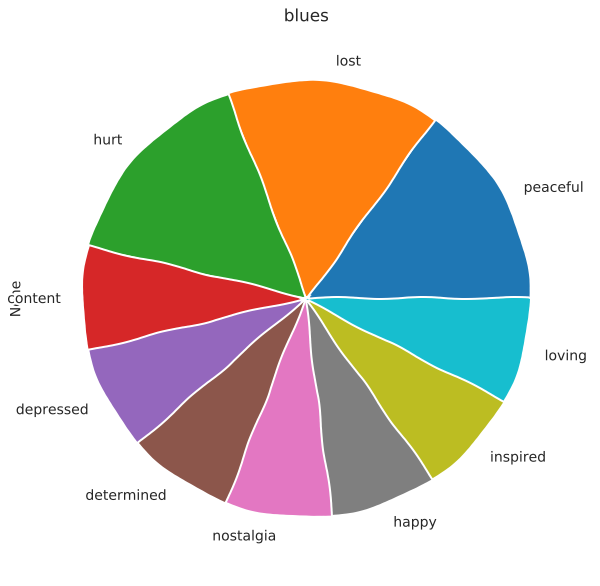

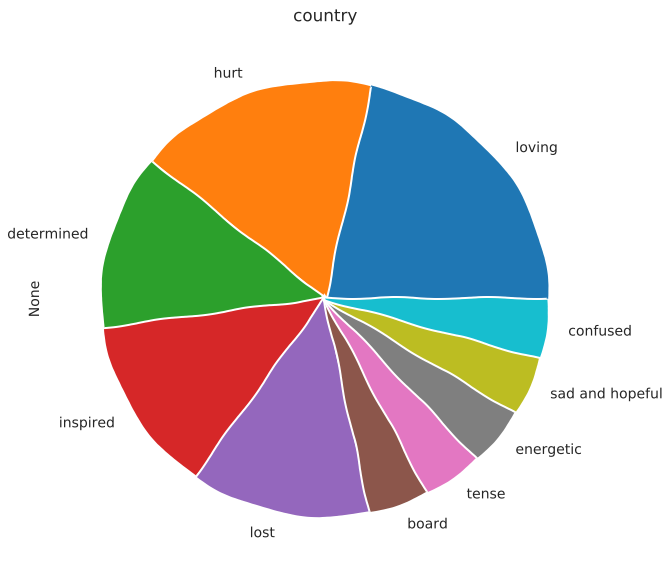

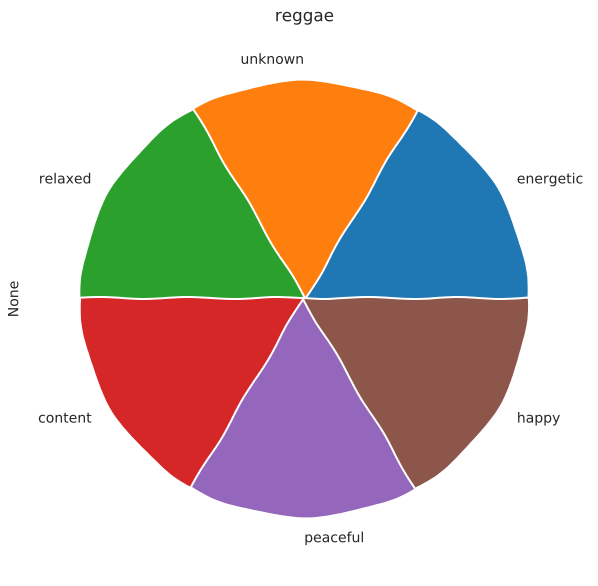

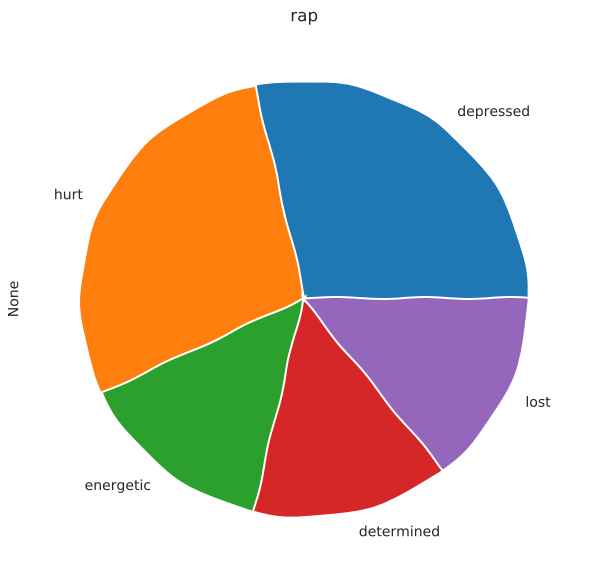

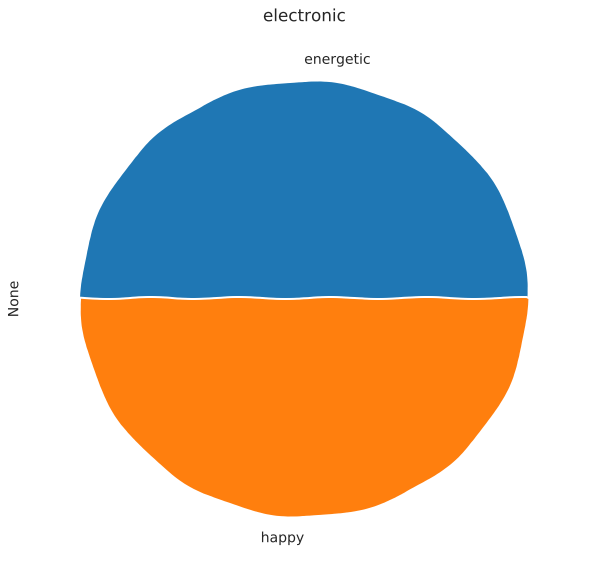

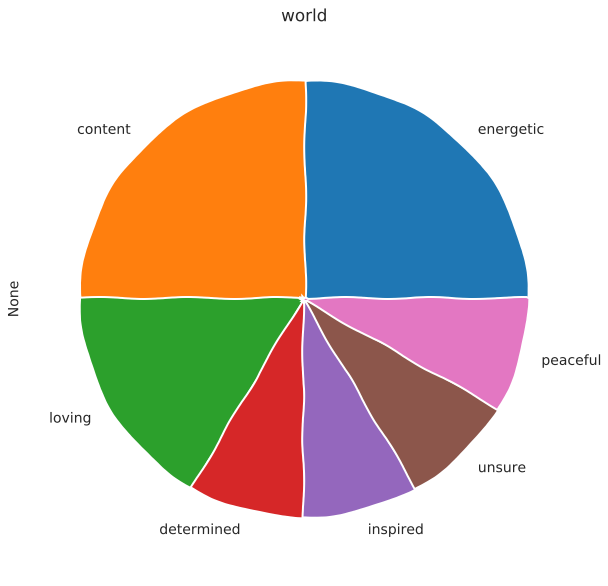

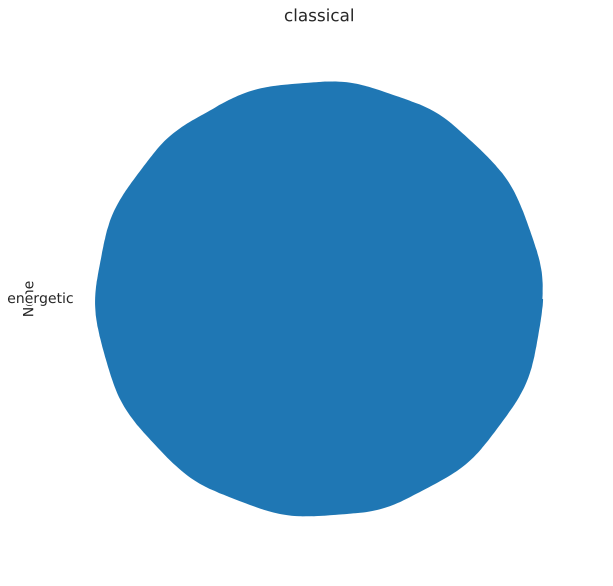

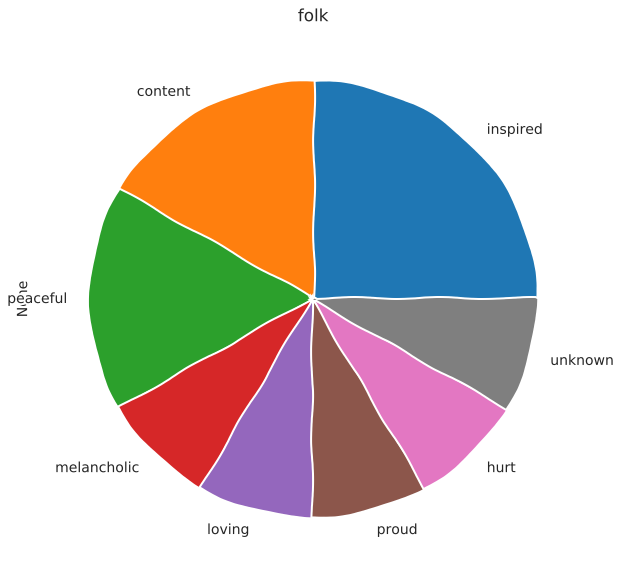

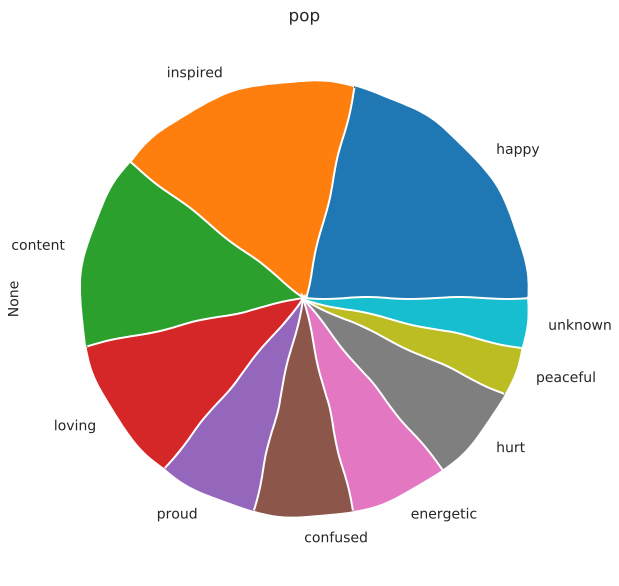

In [20]:
for genre in genres:
    plot_intended_emotion(genre)

In [21]:
emot = df[['picked', 'actual genre', 'intended emotion']].dropna()
# print(emot)
def plot_persong_intended_emotion(option):
    fig = plt.figure(figsize=(10,10))
    features = emot[emot['picked'] == option]
    if features.empty:
        return
    features['intended emotion'] = features['intended emotion'].str.split(', ')
#     print(features.head())
    a = []
    for attribs in features['intended emotion']:
        a.extend(attribs)
    pd.Series(a).value_counts().plot(kind='pie', title=songs[option])

/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.default

<Figure size 720x720 with 0 Axes>

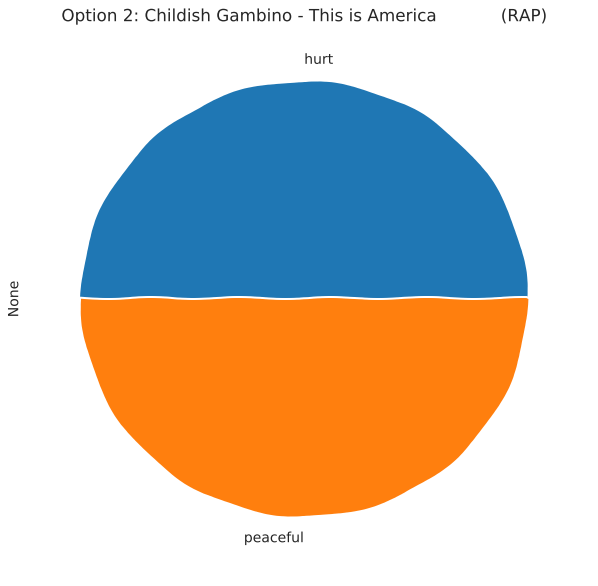

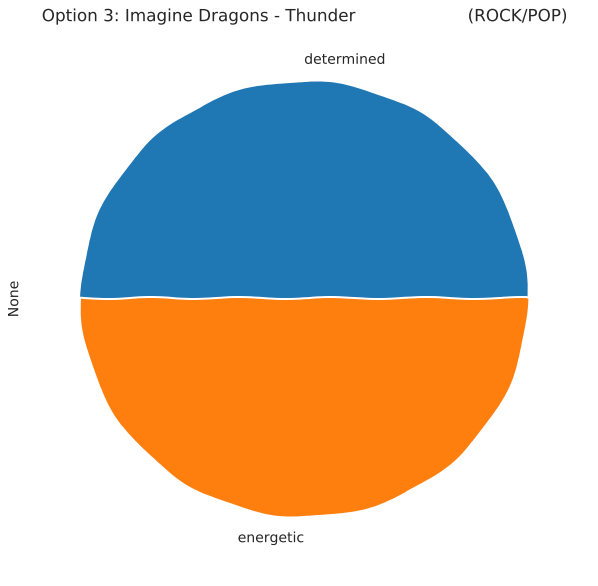

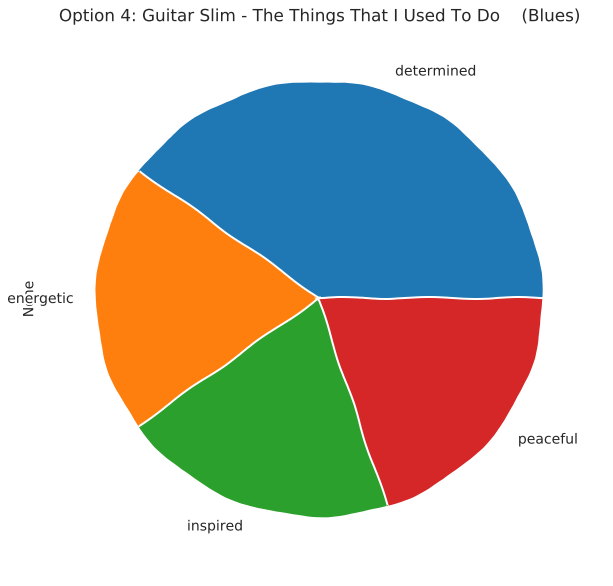

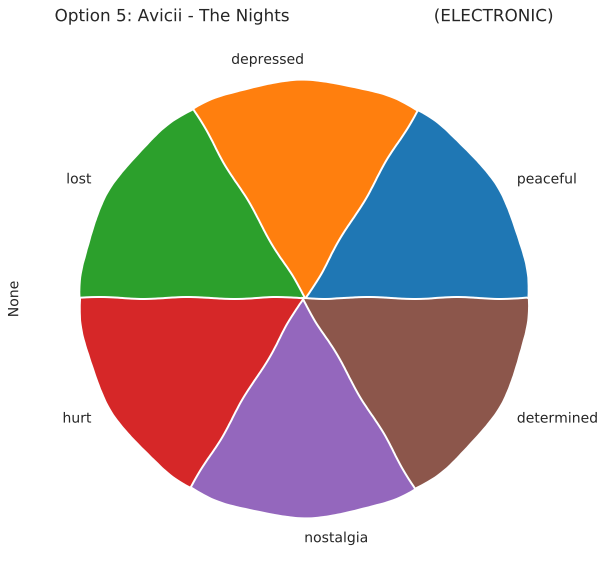

<Figure size 720x720 with 0 Axes>

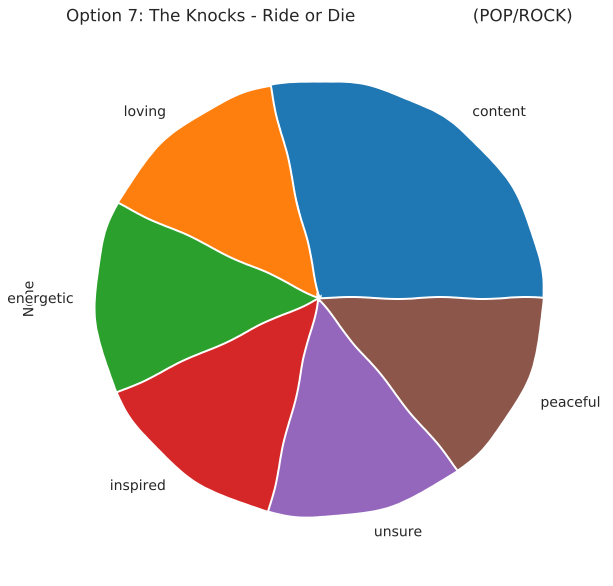

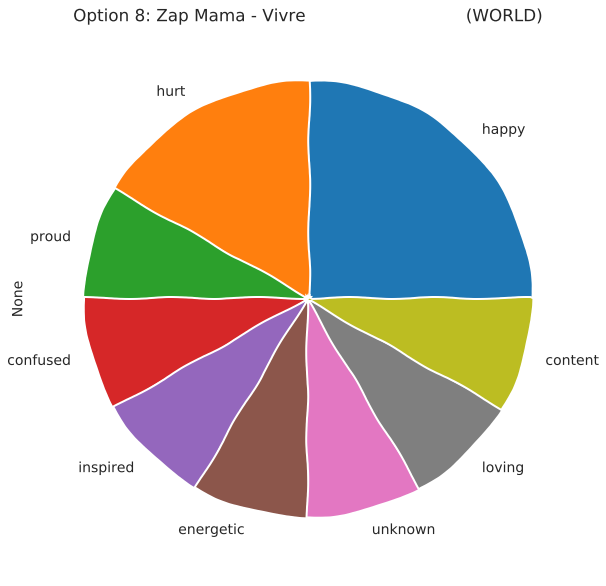

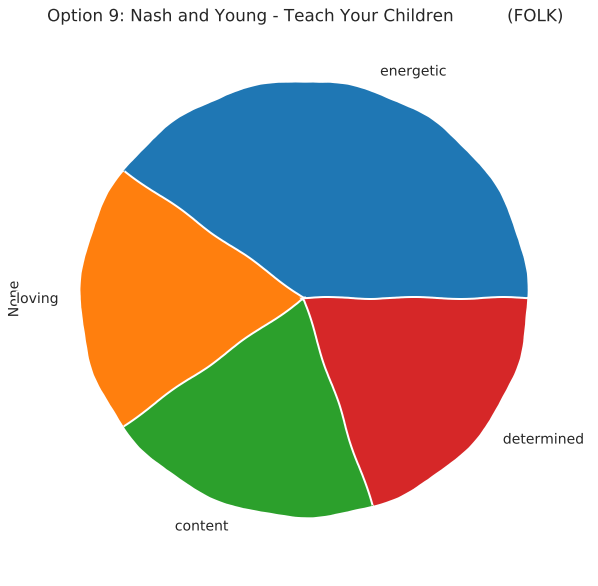

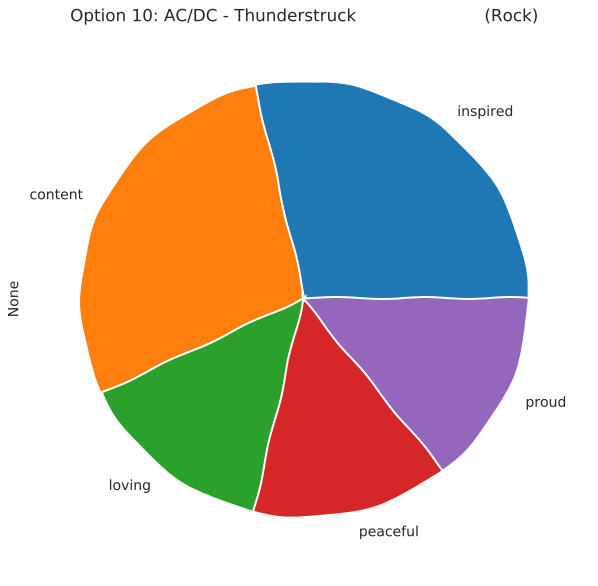

<Figure size 720x720 with 0 Axes>

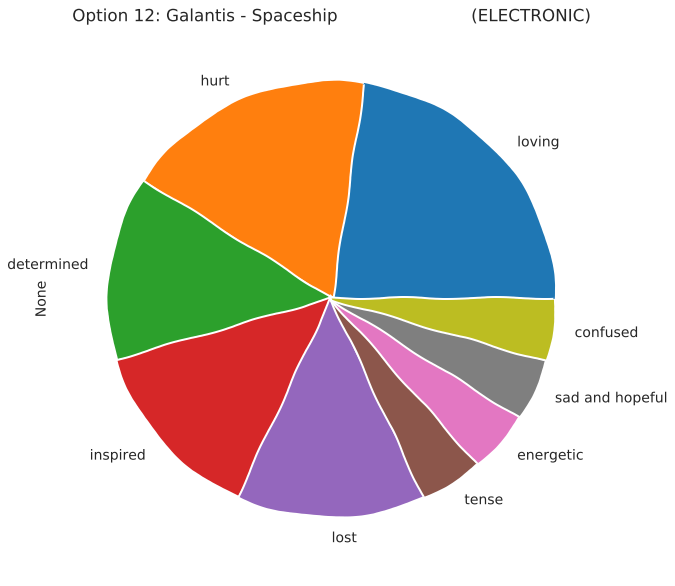

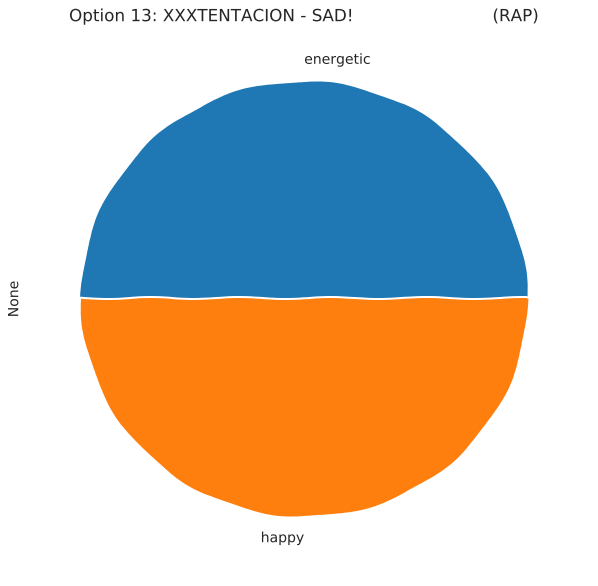

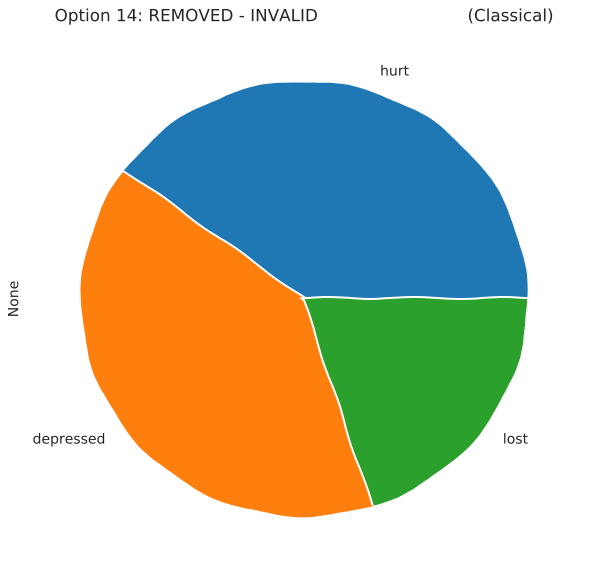

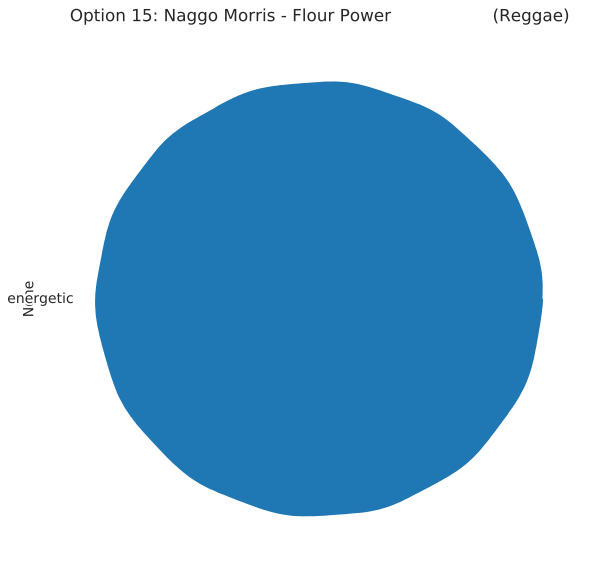

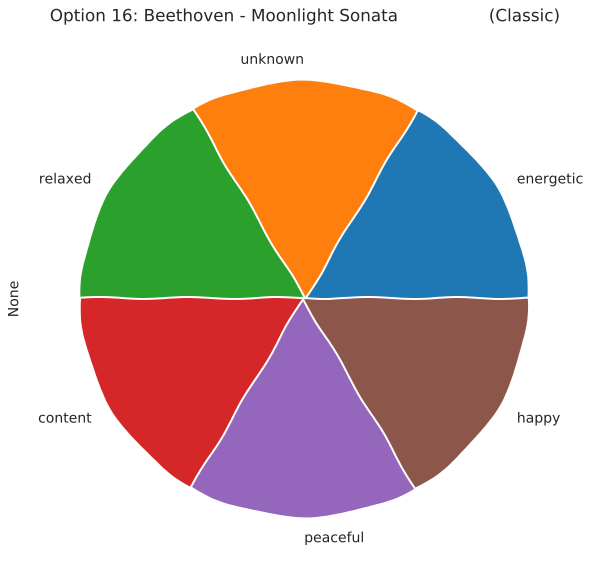

<Figure size 720x720 with 0 Axes>

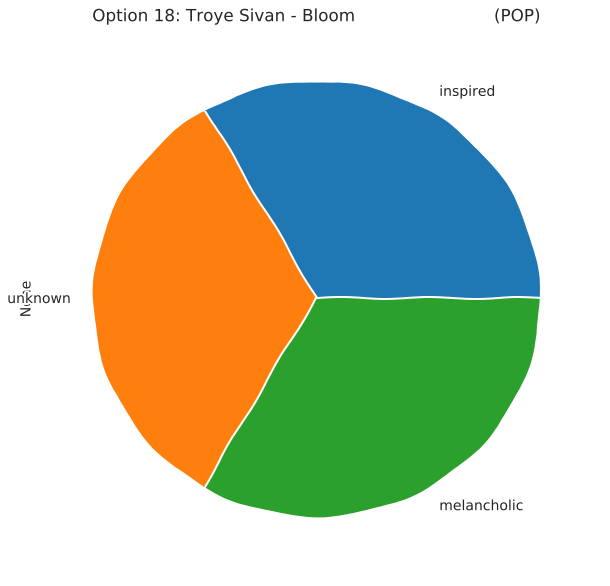

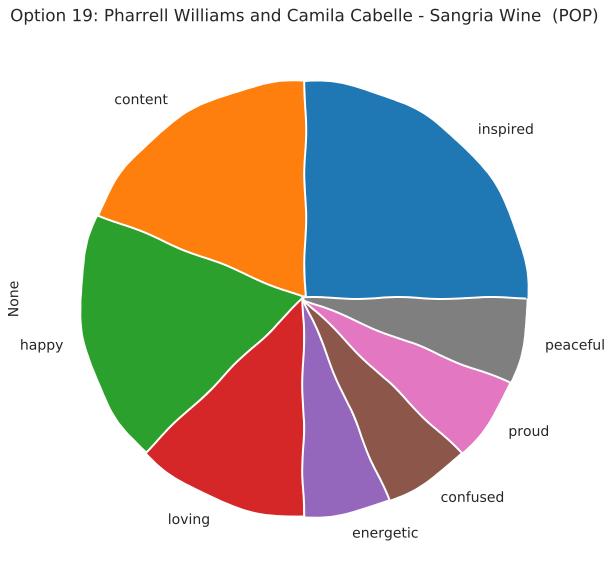

<Figure size 720x720 with 0 Axes>

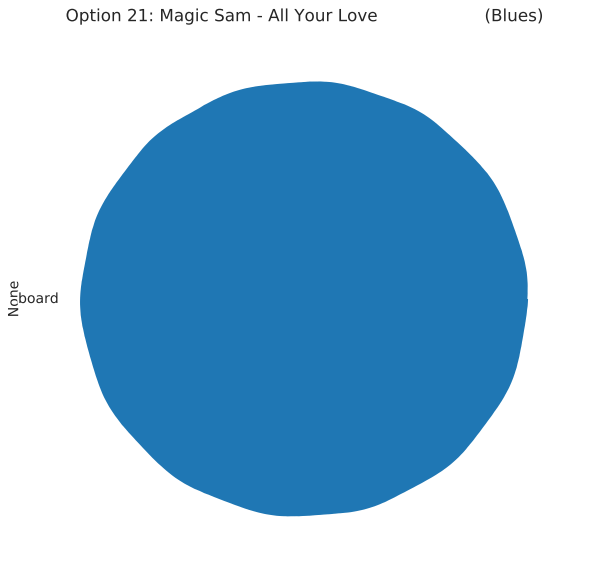

In [22]:
for i in range(21):
    plot_persong_intended_emotion(i)

In [23]:
adjectives = df[['actual genre', 'adjectives']].dropna()

def plot_adjectives(genre):
    fig = plt.figure(figsize=(10,10))
    features = adjectives[adjectives['actual genre'] == genre]
    if features.empty:
        return
    features['adjectives'] = features['adjectives'].str.split(', ')
#     print(features.head())
    a = []
    for attribs in features['adjectives']:
        a.extend(attribs)
    pd.Series(a).value_counts().plot(kind='pie', title=genre)

/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


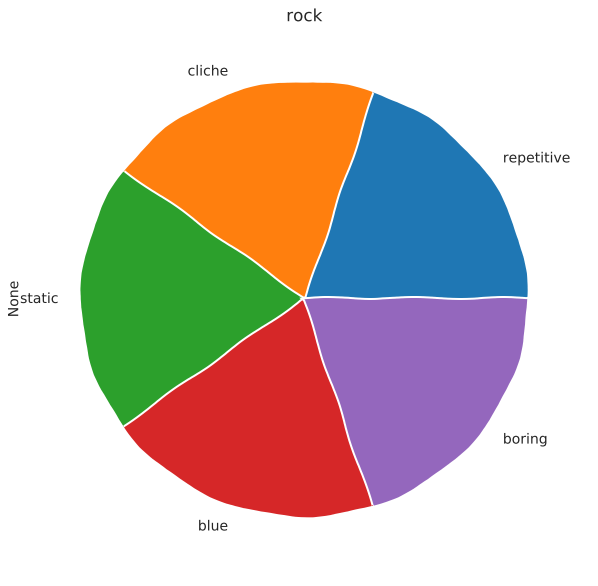

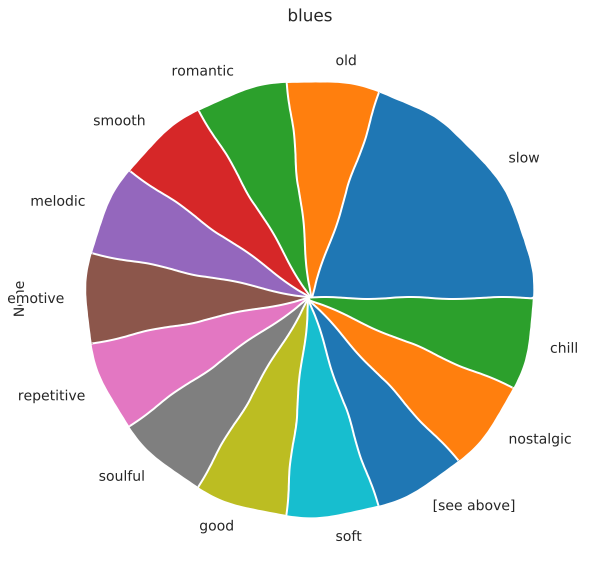

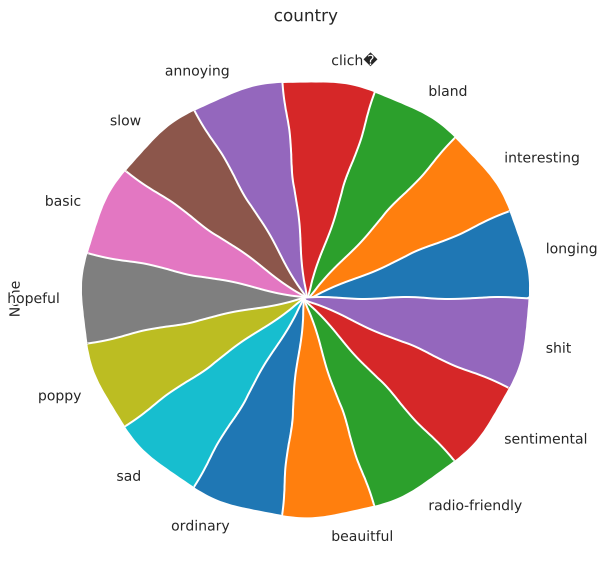

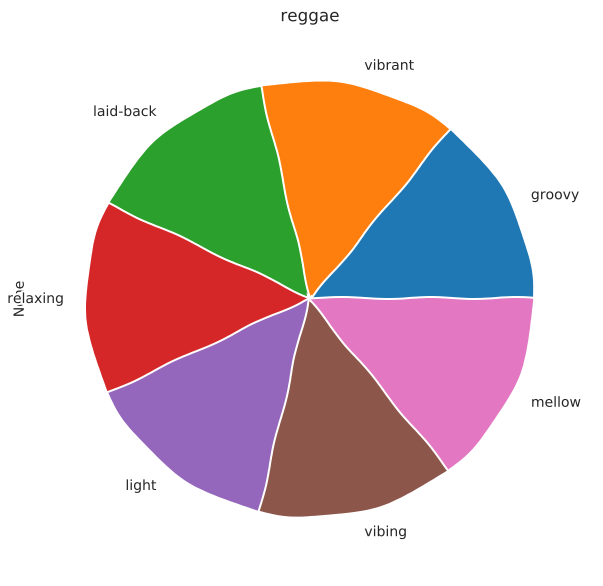

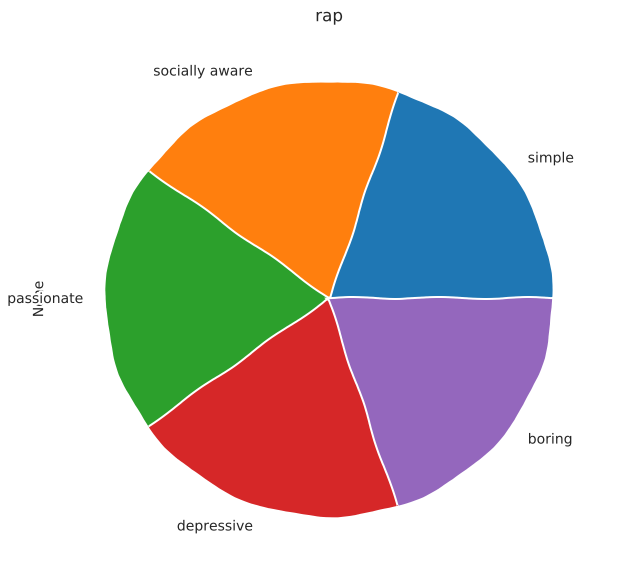

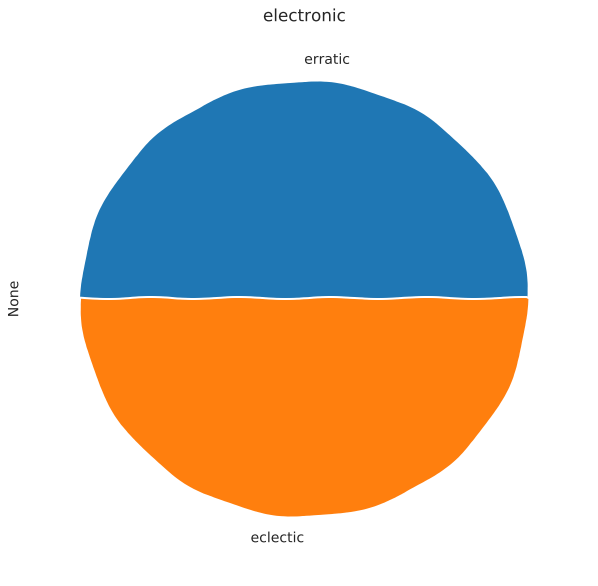

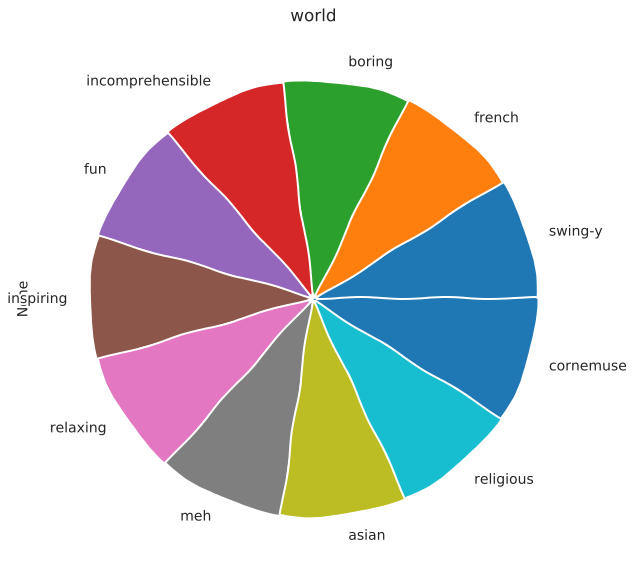

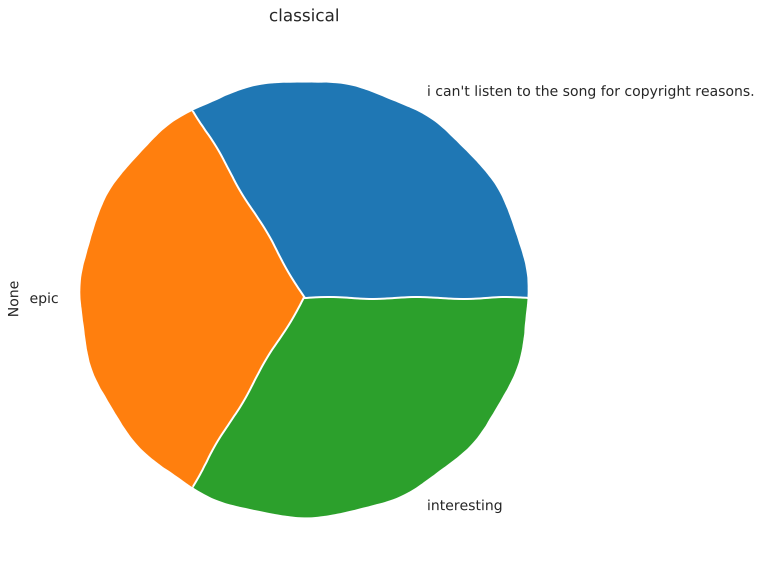

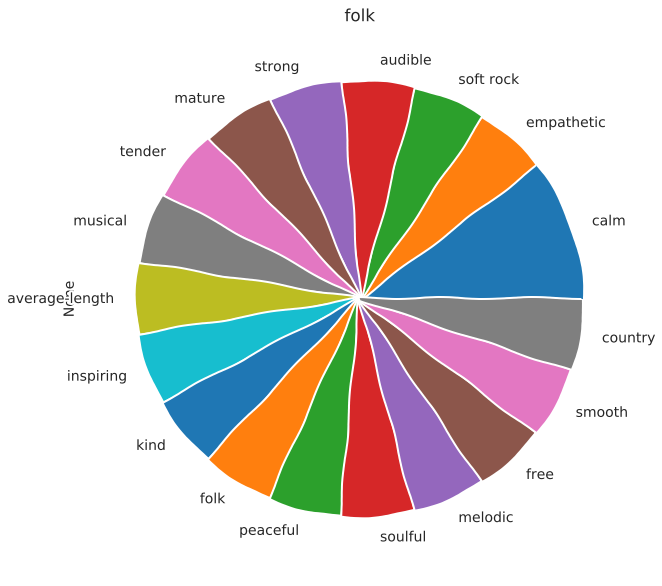

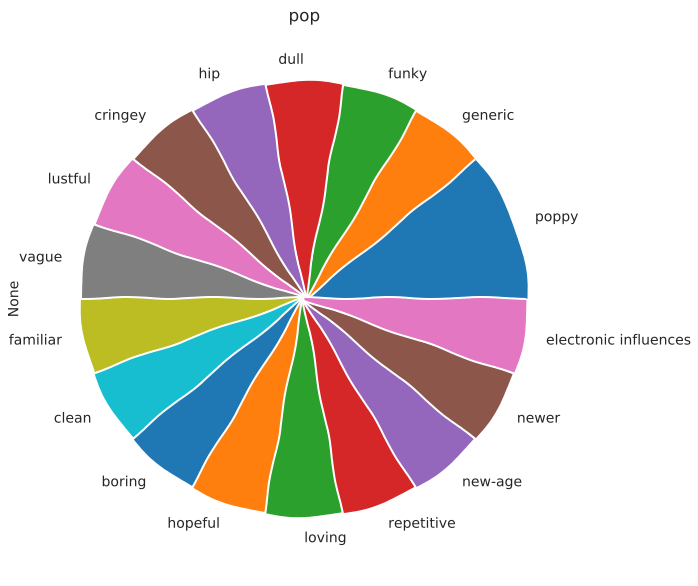

In [24]:
for genre in genres:
    plot_adjectives(genre)

/home/rocket/miniconda3/envs/genre/lib/python3.6/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family ['xkcd', 'Humor Sans', 'Comic Sans MS'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


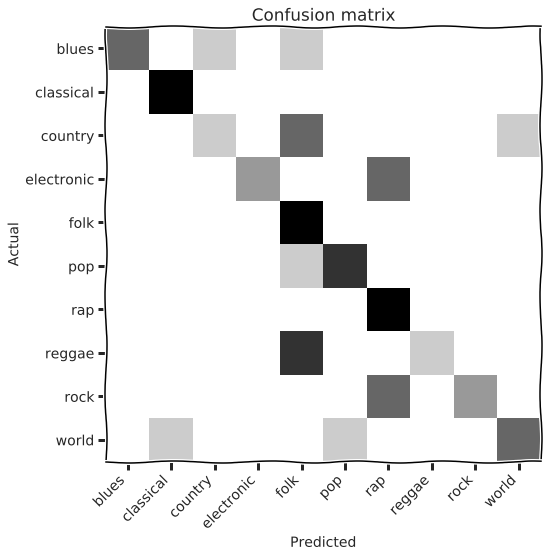

In [25]:
from tests import ModelAccuracyTest
mat = ModelAccuracyTest()
mat.setUp()
mat.confusion_matrix()